In [43]:
import numpy as np
import nsepy as NSE
from sklearn.preprocessing import MinMaxScaler as mms
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
infy_traindata=NSE.get_history(symbol='INFY',start=date(2015,1,1),end=date(2018,9,26))
infy_testdata=NSE.get_history(symbol='INFY',start=date(2018,9,27),end=date(2019,9,26))


In [5]:
list(infy_traindata)

infy_traindata.drop(['Symbol','Series','Prev Close','Last','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble'],1,inplace=True)
infy_traindata.head()

trainset=infy_traindata.iloc[:,1:2]
(trainset)

,High
Date,
2015-01-01,1982.00
2015-01-02,2019.05
2015-01-05,2030.00
2015-01-06,1985.00
2015-01-07,1974.75
2015-01-08,1997.00
2015-01-09,2109.00
2015-01-12,2119.20
2015-01-13,2107.80


In [19]:
scaler=mms(feature_range=(0,1))
trainset_scaled=scaler.fit_transform(trainset)

x_train=[]
y_train=[]

for i in range(60, 926):
    x_train.append(trainset_scaled[i-60:i, 0])
    y_train.append(trainset_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train)
x_train.shape

[[[0.78129247]
  [0.80418263]
  [0.81094773]
  ...
  [0.93398616]
  [0.92518226]
  [0.93123687]]

 [[0.80418263]
  [0.81094773]
  [0.78314593]
  ...
  [0.92518226]
  [0.93123687]
  [0.94068948]]

 [[0.81094773]
  [0.78314593]
  [0.7768133 ]
  ...
  [0.93123687]
  [0.94068948]
  [0.96147906]]

 ...

 [[0.34999382]
  [0.35589398]
  [0.35870505]
  ...
  [0.00778451]
  [0.00593105]
  [0.        ]]

 [[0.35589398]
  [0.35870505]
  [0.36920796]
  ...
  [0.00593105]
  [0.        ]
  [0.00775361]]

 [[0.35870505]
  [0.36920796]
  [0.3846534 ]
  ...
  [0.        ]
  [0.00775361]
  [0.01149141]]]


(866, 60, 1)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [21]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60,1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [22]:
regressor.add(Dense(units=1))

In [23]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [24]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
866/866 [==============================] - 5s 6ms/step - loss: 0.0225
Epoch 2/100
866/866 [==============================] - 2s 2ms/step - loss: 0.0060
Epoch 3/100
866/866 [==============================] - 2s 2ms/step - loss: 0.0059
Epoch 4/100
866/866 [==============================] - 2s 2ms/step - loss: 0.0062
Epoch 5/100
866/866 [==============================] - 2s 2ms/step - loss: 0.0051
Epoch 6/100
866/866 [==============================] - 2s 2ms/step - loss: 0.0055
Epoch 7/100
866/866 [==============================] - 2s 2ms/step - loss: 0.0058
Epoch 8/100
866/866 [==============================] - 2s 2ms/step - loss: 0.0043
Epoch 9/100
866/866 [==============================] - 2s 2ms/step - loss: 0.0042
Epoch 10/100
866/866 [==============================] - 2s 2ms/step - loss: 0.0042
Epoch 11/100
866/866 [==============================] - 2s 2ms/step - loss: 0.0046
Epoch 12/100
866/866 [==========================

866/866 [==============================] - 2s 2ms/step - loss: 0.0013
Epoch 97/100
866/866 [==============================] - 2s 2ms/step - loss: 0.0019
Epoch 98/100
866/866 [==============================] - 2s 2ms/step - loss: 0.0016
Epoch 99/100
866/866 [==============================] - 2s 2ms/step - loss: 0.0016
Epoch 100/100
866/866 [==============================] - 2s 2ms/step - loss: 0.0014


In [25]:
infy_testdata

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2018-09-27,INFY,EQ,717.85,722.00,730.80,717.45,724.30,724.80,724.80,14592616,1.057673e+15,147797,10485355,0.7185
2018-09-28,INFY,EQ,724.80,721.00,734.55,715.20,731.70,730.05,727.98,7490031,5.452630e+14,166682,4590662,0.6129
2018-10-01,INFY,EQ,730.05,737.50,754.90,733.00,742.95,746.65,745.05,8252398,6.148484e+14,160489,4483016,0.5432
2018-10-03,INFY,EQ,746.65,743.80,751.95,726.30,728.55,728.50,738.21,7792464,5.752480e+14,184479,4931984,0.6329
2018-10-04,INFY,EQ,728.50,728.50,729.75,702.50,711.00,707.20,711.02,6173037,4.389160e+14,150299,3617395,0.5860
2018-10-05,INFY,EQ,707.20,713.00,731.50,709.30,722.50,724.60,717.57,8543578,6.130590e+14,141622,4727502,0.5533
2018-10-08,INFY,EQ,724.60,725.05,728.70,709.25,714.65,714.45,717.09,7259306,5.205582e+14,244347,4344672,0.5985
2018-10-09,INFY,EQ,714.45,717.10,722.40,702.65,721.00,717.75,711.05,6777212,4.818904e+14,116349,3665401,0.5408
2018-10-10,INFY,EQ,717.75,719.90,719.90,695.40,700.35,700.45,703.19,8866251,6.234700e+14,219744,4098711,0.4623


In [26]:
infy_testdata.drop(['Symbol','Series','Prev Close','Last','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble'],1,inplace=True)

In [27]:
infy_testdata

,Open,High,Low,Close,Volume
Date,,,,,
2018-09-27,722.00,730.80,717.45,724.80,14592616
2018-09-28,721.00,734.55,715.20,730.05,7490031
2018-10-01,737.50,754.90,733.00,746.65,8252398
2018-10-03,743.80,751.95,726.30,728.50,7792464
2018-10-04,728.50,729.75,702.50,707.20,6173037
2018-10-05,713.00,731.50,709.30,724.60,8543578
2018-10-08,725.05,728.70,709.25,714.45,7259306
2018-10-09,717.10,722.40,702.65,717.75,6777212
2018-10-10,719.90,719.90,695.40,700.45,8866251


In [31]:
testprice=infy_testdata.iloc[:,1:2]

In [32]:
testprice

,High
Date,
2018-09-27,730.80
2018-09-28,734.55
2018-10-01,754.90
2018-10-03,751.95
2018-10-04,729.75
2018-10-05,731.50
2018-10-08,728.70
2018-10-09,722.40
2018-10-10,719.90


In [35]:
dataset_total = pd.concat((infy_traindata['Open'], infy_testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(infy_testdata) - 60:].values
inputs = inputs.reshape(-1,1)

In [37]:
inputs = scaler.transform(inputs)

In [38]:
inputs

array([[ 3.58735945e-01],
       [ 3.68590140e-01],
       [ 3.79649079e-01],
       [ 3.92098109e-01],
       [ 3.89039911e-01],
       [ 3.53916965e-01],
       [ 3.58087236e-01],
       [ 3.65192141e-01],
       [ 3.70783393e-01],
       [ 3.76065736e-01],
       [ 3.69207957e-01],
       [ 3.70690720e-01],
       [ 3.78289880e-01],
       [ 3.84529841e-01],
       [ 3.74150500e-01],
       [ 3.76003954e-01],
       [ 3.92159891e-01],
       [ 4.05906339e-01],
       [ 4.08748301e-01],
       [ 4.08470283e-01],
       [ 4.05164957e-01],
       [ 4.03187940e-01],
       [ 3.89935747e-01],
       [ 3.99357469e-01],
       [ 3.96762634e-01],
       [ 4.00840232e-01],
       [ 4.00747560e-01],
       [ 4.05659212e-01],
       [ 4.04300012e-01],
       [ 4.05442975e-01],
       [ 4.12949462e-01],
       [ 4.15544298e-01],
       [ 4.30341035e-01],
       [ 4.30958853e-01],
       [ 4.40813048e-01],
       [ 4.14308662e-01],
       [ 4.15544298e-01],
       [ 4.17397751e-01],
       [ 4.1

In [41]:
x_test = []
for i in range(60, 245):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

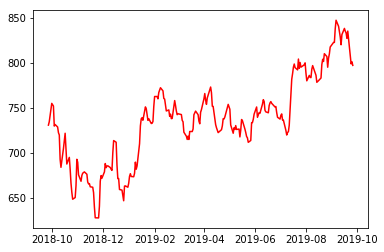

In [45]:
plt.plot(testprice, color = 'red', label = 'Real INFY Stock Price')


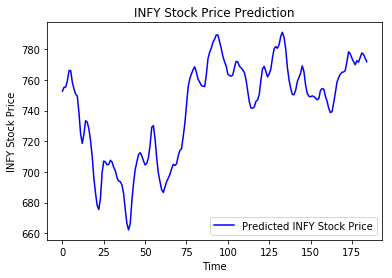

In [46]:
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted INFY Stock Price')
plt.title('INFY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('INFY Stock Price')
plt.legend()
plt.show()
